In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 5th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q11A', 'Q11B', 'Q11C']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Attend community meeting', 'Join others to raise an issue', 'Attend a demonstration']

df_new.head()

,State,Attend community meeting,Join others to raise an issue,Attend a demonstration
0,IMO,"No, would never do this","Yes, several times","No, would never do this"
1,FCT ABUJA,"Yes, often","Yes, often","No, would never do this"
2,FCT ABUJA,"Yes, several times","No, would never do this","No, would never do this"
3,FCT ABUJA,"Yes, several times","Yes, several times","Yes, often"
4,FCT ABUJA,"No, would do it if I had the chance","Yes, once or twice","No, would do it if I had the chance"


In [13]:
df_new['Attend community meeting'].value_counts(normalize=True)

No, would never do this                0.227889
Yes, often                             0.218851
Yes, several times                     0.207876
No, would do it if I had the chance    0.187863
Yes, once or twice                     0.157521
Name: Attend community meeting, dtype: float64

In [14]:
df_new['Join others to raise an issue'].value_counts(normalize=True)

No, would never do this                0.258231
No, would do it if I had the chance    0.199484
Yes, several times                     0.194319
Yes, often                             0.183990
Yes, once or twice                     0.163977
Name: Join others to raise an issue, dtype: float64

In [15]:
df_new['Attend a demonstration'].value_counts(normalize=True)

No, would never do this                0.516462
No, would do it if I had the chance    0.187218
Yes, often                             0.119432
Yes, once or twice                     0.092318
Yes, several times                     0.084571
Name: Attend a demonstration, dtype: float64

In [8]:
# Removes "Don't know" and "Refused" as options in the questions asked.
hope = ["Don't know","Refused"]
less = ['Attend community meeting', 'Join others to raise an issue', 'Attend a demonstration']

for j in less:
    for i in hope:
        df_new = df_new.loc[df_new[j] != i]

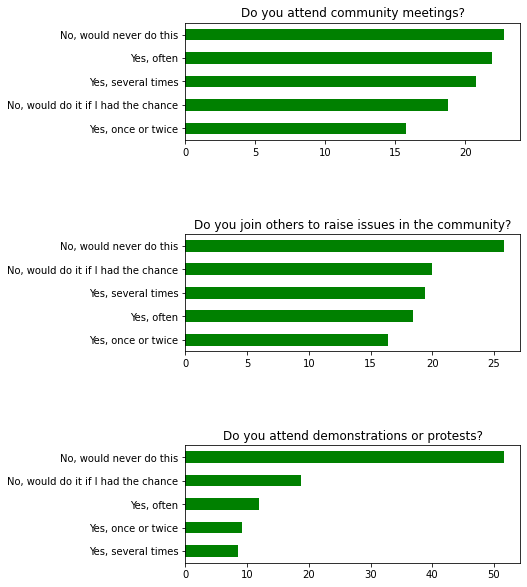

In [12]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.8, top=2)

# Add the main title
# fig.suptitle("Main Title", fontsize=15)

# Add the subplots
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


# Plot for axis 1-4
(df_new['Attend community meeting'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Join others to raise an issue'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')
(df_new['Attend a demonstration'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax3, color='green')


# Add the text for each subplot
ax1.title.set_text("Do you attend community meetings?")
ax2.title.set_text("Do you join others to raise issues in the community?")
ax3.title.set_text("Do you attend demonstrations or protests?")

plt.show()